--- Random Forest ---
Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123

--- Decision Tree ---
Accuracy: 0.7073
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        43
           1       0.75      0.82      0.79        80

    accuracy                           0.71       123
   macro avg       0.68      0.66      0.66       123
weighted avg       0.70      0.71      0.70       123

--- Logistic Regression ---
Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   ma

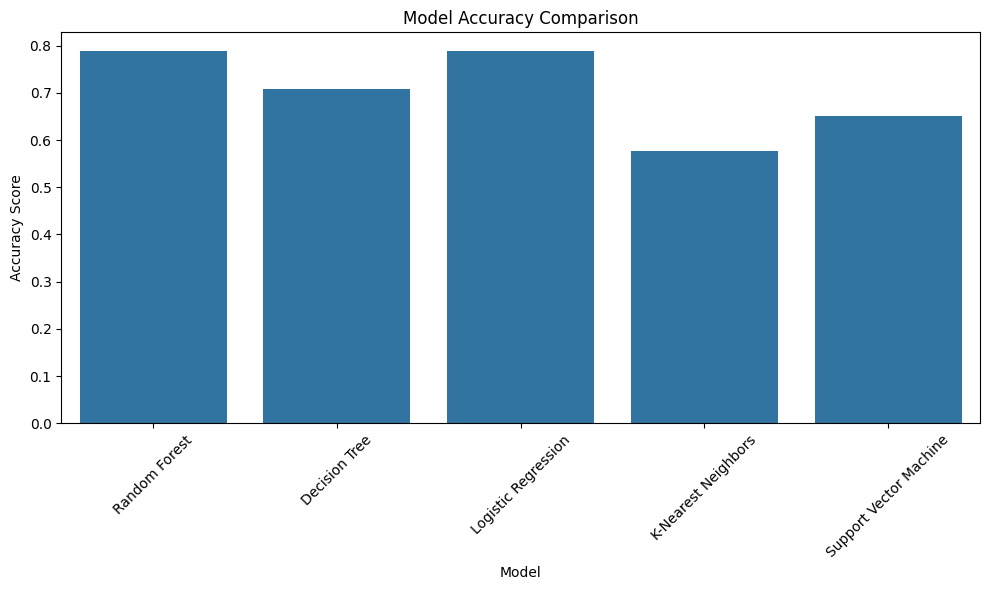

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Handling missing values: Fill missing LoanAmount with median, Loan_Amount_Term with mode, and Credit_History with mode
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# Fill missing values for categorical features
loan_train['Gender'] = loan_train['Gender'].fillna('Unknown')
loan_train['Married'] = loan_train['Married'].fillna('Unknown')
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')
loan_train['Dependents'] = loan_train['Dependents'].fillna('0')
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna('No')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
label_encoder = LabelEncoder()
loan_train['Loan_Status'] = label_encoder.fit_transform(loan_train['Loan_Status'])

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total ti

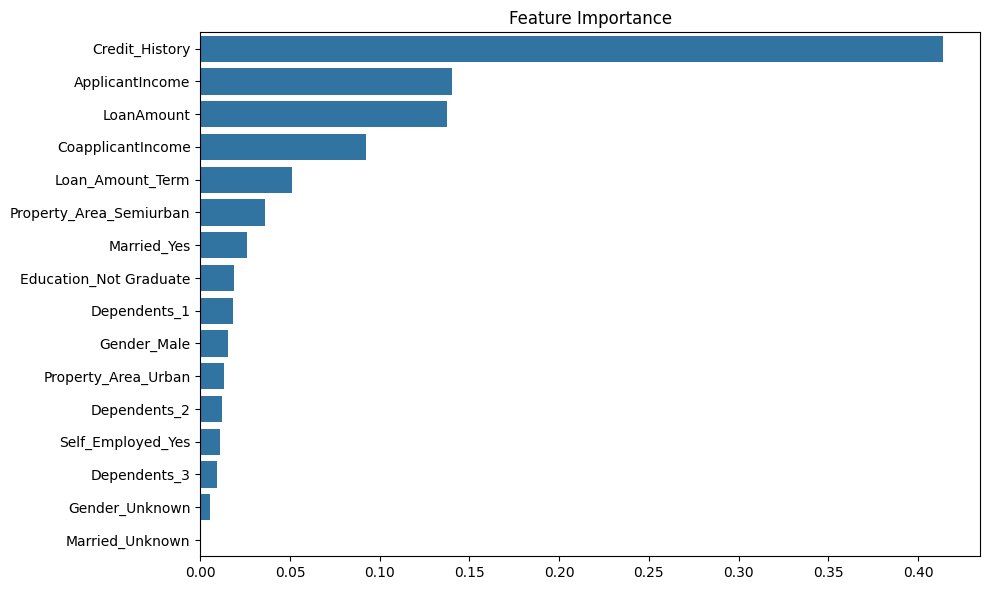

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Handling missing values: Fill missing LoanAmount with median, Loan_Amount_Term with mode, and Credit_History with mode
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# Fill missing values for categorical features
loan_train['Gender'] = loan_train['Gender'].fillna('Unknown')
loan_train['Married'] = loan_train['Married'].fillna('Unknown')
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')
loan_train['Dependents'] = loan_train['Dependents'].fillna('0')
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna('No')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning (set n_jobs=1 to avoid multiprocessing issues)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 5: Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest F1-score: {f1:.4f}")
print(classification_report(y_test, y_pred))

# Step 6: Visualize feature importance (Optional)
plt.figure(figsize=(10, 6))
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Handling missing values: Fill missing LoanAmount with median, Loan_Amount_Term with mode, and Credit_History with mode
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# Fill missing values for categorical features
loan_train['Gender'] = loan_train['Gender'].fillna('Unknown')
loan_train['Married'] = loan_train['Married'].fillna('Unknown')
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')
loan_train['Dependents'] = loan_train['Dependents'].fillna('0')
loan_train['Self_Employed'] = loan_train['Self_Employed'].fillna('No')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning (set n_jobs=1 to avoid multiprocessing issues)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1, verbose=0)  # verbose=0 for minimum output
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 5: Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

# Step 6: Visualize feature importance (Optional)
plt.figure(figsize=(10, 6))
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
